<a href="https://www.kaggle.com/code/binisme/fitbit-analysis?scriptVersionId=199759967" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fitbit/mturkfitbit_export_3.12.16-4.11.16/Fitabase Data 3.12.16-4.11.16/minuteCaloriesNarrow_merged.csv
/kaggle/input/fitbit/mturkfitbit_export_3.12.16-4.11.16/Fitabase Data 3.12.16-4.11.16/weightLogInfo_merged.csv
/kaggle/input/fitbit/mturkfitbit_export_3.12.16-4.11.16/Fitabase Data 3.12.16-4.11.16/minuteMETsNarrow_merged.csv
/kaggle/input/fitbit/mturkfitbit_export_3.12.16-4.11.16/Fitabase Data 3.12.16-4.11.16/hourlyCalories_merged.csv
/kaggle/input/fitbit/mturkfitbit_export_3.12.16-4.11.16/Fitabase Data 3.12.16-4.11.16/heartrate_seconds_merged.csv
/kaggle/input/fitbit/mturkfitbit_export_3.12.16-4.11.16/Fitabase Data 3.12.16-4.11.16/minuteSleep_merged.csv
/kaggle/input/fitbit/mturkfitbit_export_3.12.16-4.11.16/Fitabase Data 3.12.16-4.11.16/hourlyIntensities_merged.csv
/kaggle/input/fitbit/mturkfitbit_export_3.12.16-4.11.16/Fitabase Data 3.12.16-4.11.16/hourlySteps_merged.csv
/kaggle/input/fitbit/mturkfitbit_export_3.12.16-4.11.16/Fitabase Data 3.12.16-4.11.16/minuteSteps

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
from scipy import stats

def display_all(df):
    with pd.option_context("display.max_rows", 20, 
                           "display.max_columns", 300,
                           "display.max_colwidth", None):
        display(df)

#####################
## Load CSV files ##
#####################

In [3]:
daily_activity = pd.read_csv("/kaggle/input/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/dailyActivity_merged.csv")

# Create another dataframe for the sleep data.
sleep_day = pd.read_csv("/kaggle/input/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/sleepDay_merged.csv")

In [4]:
daily_activity.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,4/16/2016,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863


In [5]:
sleep_day.head()

,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,4/12/2016 12:00:00 AM,1,327,346
1,1503960366,4/13/2016 12:00:00 AM,2,384,407
2,1503960366,4/15/2016 12:00:00 AM,1,412,442
3,1503960366,4/16/2016 12:00:00 AM,2,340,367
4,1503960366,4/17/2016 12:00:00 AM,1,700,712


#####################################
## Understanding some summary statistics ##
#####################################

In [6]:
print(daily_activity['Id'].nunique())
print(sleep_day['Id'].nunique())

33
24


number of unique participants in 2 datasets is not equal

In [7]:
print(len(daily_activity))
print(len(sleep_day))

940
413


number of observation also not equal

##################################
## Merging these two datasets together ##
##################################

In [8]:
combined_data = pd.merge(sleep_day, daily_activity, on='Id')

In [9]:
combined_data['Id'].nunique()

24

In [10]:
combined_data.columns

Index(['Id', 'SleepDay', 'TotalSleepRecords', 'TotalMinutesAsleep',
       'TotalTimeInBed', 'ActivityDate', 'TotalSteps', 'TotalDistance',
       'TrackerDistance', 'LoggedActivitiesDistance', 'VeryActiveDistance',
       'ModeratelyActiveDistance', 'LightActiveDistance',
       'SedentaryActiveDistance', 'VeryActiveMinutes', 'FairlyActiveMinutes',
       'LightlyActiveMinutes', 'SedentaryMinutes', 'Calories'],
      dtype='object')

In [11]:
display_all(combined_data)

,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016 12:00:00 AM,1,327,346,4/12/2016,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,4/12/2016 12:00:00 AM,1,327,346,4/13/2016,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,4/12/2016 12:00:00 AM,1,327,346,4/14/2016,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,4/12/2016 12:00:00 AM,1,327,346,4/15/2016,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,4/12/2016 12:00:00 AM,1,327,346,4/16/2016,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12436,8792009665,5/4/2016 12:00:00 AM,1,439,463,5/6/2016,0,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0,0,0,1440,1688
12437,8792009665,5/4/2016 12:00:00 AM,1,439,463,5/7/2016,0,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0,0,0,1440,1688
12438,8792009665,5/4/2016 12:00:00 AM,1,439,463,5/8/2016,0,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0,0,0,1440,1688
12439,8792009665,5/4/2016 12:00:00 AM,1,439,463,5/9/2016,0,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0,0,0,1440,1688


#####################################
## Aggregating data on daily and weekly basis ##
#####################################

In [12]:
# Convert date columns to datetime format for aggregation.
combined_data['SleepDay'] = pd.to_datetime(combined_data['SleepDay'], format='%m/%d/%Y %I:%M:%S %p', errors='coerce')
combined_data['ActivityDate'] = pd.to_datetime(combined_data['ActivityDate'])

# Create additional variables
combined_data['TotalActiveMinutes'] = combined_data['VeryActiveMinutes'] + combined_data['FairlyActiveMinutes'] + combined_data['LightlyActiveMinutes']
combined_data['SleepEfficiency'] = combined_data['TotalMinutesAsleep'] / combined_data['TotalTimeInBed']

# Aggregate on a daily basis.
daily_aggregated = combined_data.groupby('ActivityDate', observed=True).agg({
    'TotalSteps': 'sum',
    'TotalDistance': 'sum',
    'SedentaryMinutes': 'sum',
    'TotalMinutesAsleep': 'sum',
    'TotalTimeInBed': 'sum',
    'Calories': 'sum',
    'TotalActiveMinutes': 'sum',
    'SleepEfficiency': 'mean'
}).reset_index()

print("Daily Aggregated Data")
display_all(daily_aggregated)

Daily Aggregated Data


,ActivityDate,TotalSteps,TotalDistance,SedentaryMinutes,TotalMinutesAsleep,TotalTimeInBed,Calories,TotalActiveMinutes,SleepEfficiency
0,2016-04-12,3285251,2312.060001,368968,173240,189418,979255,85282,0.916769
1,2016-04-13,2777627,1961.739980,353517,173240,189418,925665,80190,0.916769
2,2016-04-14,3208886,2262.380008,347000,173240,189418,990490,97443,0.916769
3,2016-04-15,3632910,2569.590007,329681,173240,189418,1002364,110832,0.916769
4,2016-04-16,3580852,2545.899988,318609,173240,189418,991160,104962,0.916769
...,...,...,...,...,...,...,...,...,...
26,2016-05-08,2840243,2039.550014,302975,165352,180798,876487,85002,0.916615
27,2016-05-09,3570865,2494.049990,315019,165352,180798,933358,104026,0.916615
28,2016-05-10,3516389,2480.419980,284563,156734,171615,903502,95622,0.915483
29,2016-05-11,2703975,1900.400020,233470,150199,164808,780146,83307,0.913612


In [13]:
# Aggregate on a weekly basis.
combined_data['Week'] = combined_data['ActivityDate'].dt.isocalendar().week
weekly_aggregated = combined_data.groupby('Week', observed=True).agg({
    'TotalSteps': 'sum',
    'TotalDistance': 'sum',
    'SedentaryMinutes': 'sum',
    'TotalMinutesAsleep': 'sum',
    'TotalTimeInBed': 'sum',
    'Calories': 'sum',
    'TotalActiveMinutes': 'sum',
    'SleepEfficiency': 'mean'
}).reset_index()

print("Weekly Aggregated Data")
display_all(weekly_aggregated)

Weekly Aggregated Data


,Week,TotalSteps,TotalDistance,SedentaryMinutes,TotalMinutesAsleep,TotalTimeInBed,Calories,TotalActiveMinutes,SleepEfficiency
0,15,18689708,13232.999986,2078536,1039440,1136508,5774083,551406,0.916769
1,16,24365056,17331.480065,2347293,1212680,1325926,6933309,712117,0.916769
2,17,23918348,16825.200052,2255575,1199276,1311186,6770720,722959,0.916836
3,18,23295551,16435.909991,2293233,1164580,1273086,6554753,703476,0.916955
4,19,10718781,7520.289985,968145,601854,655757,2944005,311220,0.920032


#####################################
## Visualizing User Behavior Over Time ##
#####################################

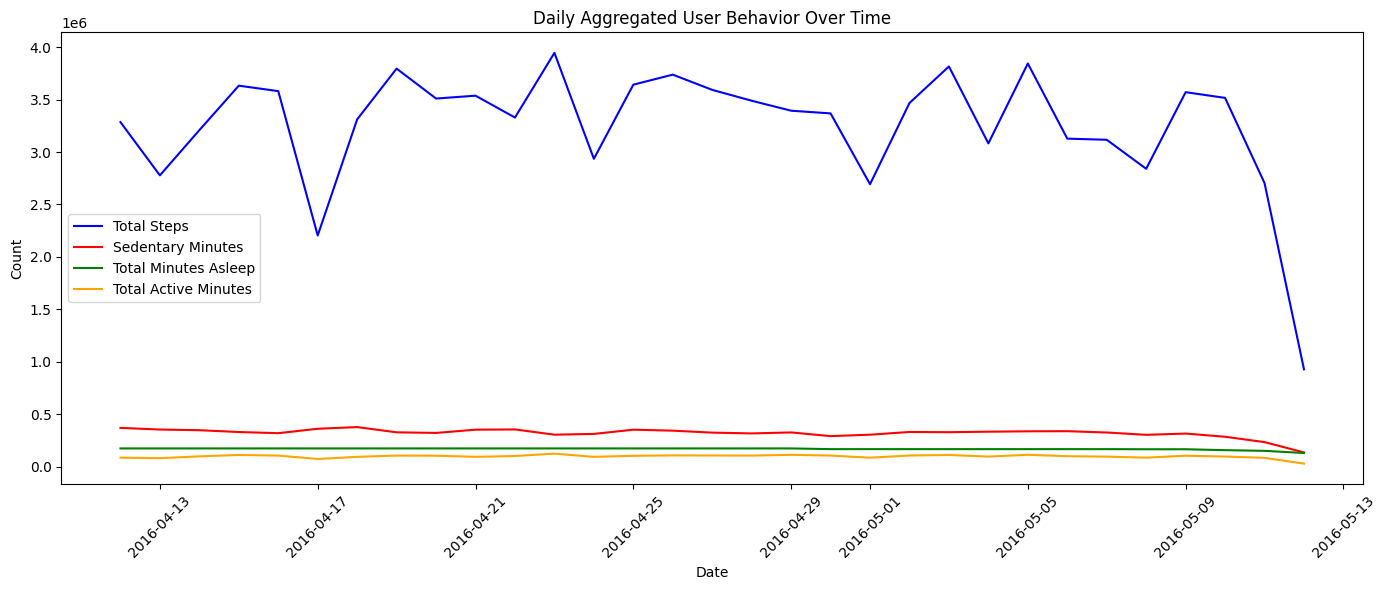

In [14]:
# Plot daily aggregated data to highlight user behavior over time.
plt.figure(figsize=(14, 6))
plt.plot(daily_aggregated['ActivityDate'], daily_aggregated['TotalSteps'], label='Total Steps', color='b')
plt.plot(daily_aggregated['ActivityDate'], daily_aggregated['SedentaryMinutes'], label='Sedentary Minutes', color='r')
plt.plot(daily_aggregated['ActivityDate'], daily_aggregated['TotalMinutesAsleep'], label='Total Minutes Asleep', color='g')
plt.plot(daily_aggregated['ActivityDate'], daily_aggregated['TotalActiveMinutes'], label='Total Active Minutes', color='orange')
plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Daily Aggregated User Behavior Over Time')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

- large total steps from 1-4 to 11-4

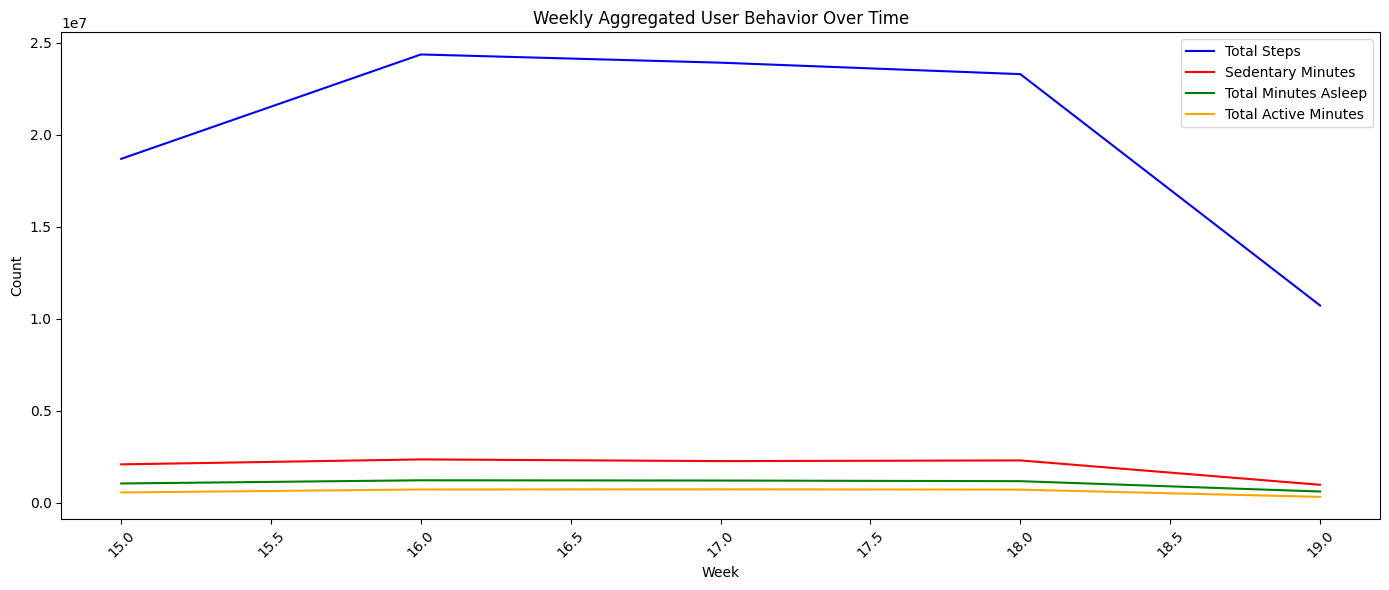

In [15]:
# Plot weekly aggregated data to highlight user behavior over time.
plt.figure(figsize=(14, 6))
plt.plot(weekly_aggregated['Week'], weekly_aggregated['TotalSteps'], label='Total Steps', color='b')
plt.plot(weekly_aggregated['Week'], weekly_aggregated['SedentaryMinutes'], label='Sedentary Minutes', color='r')
plt.plot(weekly_aggregated['Week'], weekly_aggregated['TotalMinutesAsleep'], label='Total Minutes Asleep', color='g')
plt.plot(weekly_aggregated['Week'], weekly_aggregated['TotalActiveMinutes'], label='Total Active Minutes', color='orange')
plt.xlabel('Week')
plt.ylabel('Count')
plt.title('Weekly Aggregated User Behavior Over Time')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

- peak total steps in week 14

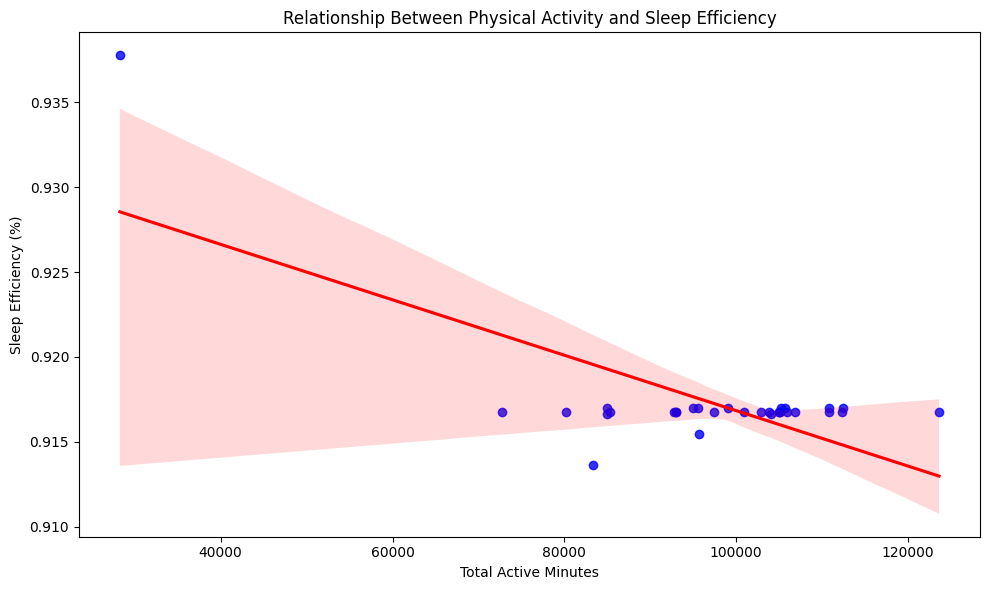

In [16]:
# Scatterplot showing the relationship between physical activity and sleep efficiency with a regression line
plt.figure(figsize=(10, 6))
sns.regplot(data=daily_aggregated, x='TotalActiveMinutes', y='SleepEfficiency', scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})
plt.xlabel('Total Active Minutes')
plt.ylabel('Sleep Efficiency (%)')
plt.title('Relationship Between Physical Activity and Sleep Efficiency')
plt.tight_layout()
plt.show()

- moderate active minutes lead to sleep efficiency
- However, too much active lead to bad sleep quality

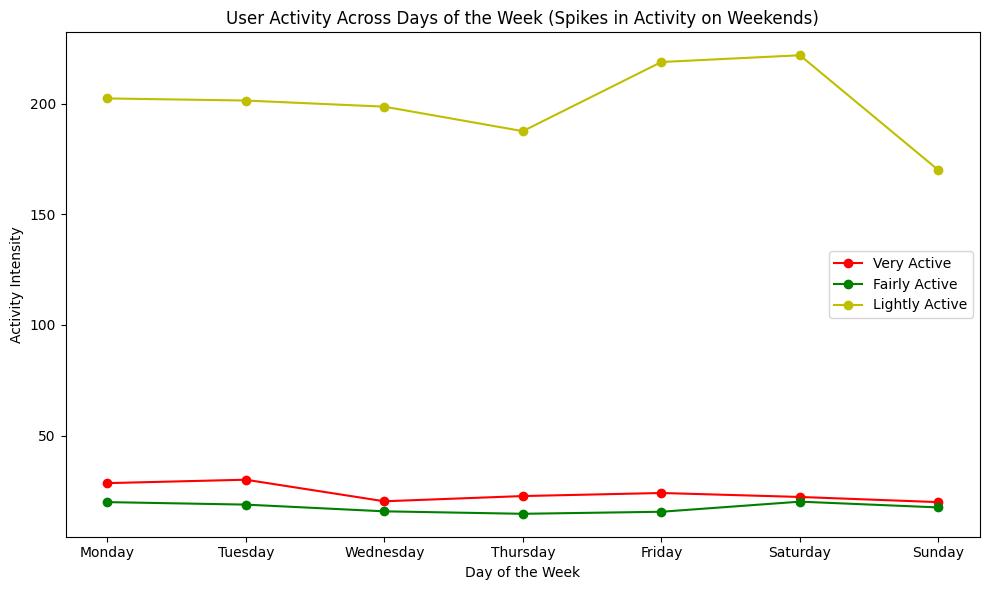

In [17]:
# Create a new column for the day of the week
combined_data['DayOfWeek'] = combined_data['ActivityDate'].dt.day_name()

# Aggregate user activity by day of the week
day_of_week_aggregated = combined_data.groupby('DayOfWeek').agg({
    'TotalSteps': 'mean',
    'VeryActiveMinutes': 'mean',
    'FairlyActiveMinutes': 'mean',
    'LightlyActiveMinutes': 'mean'
}).reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']).reset_index()

# Time series chart showing user activity across days of the week
plt.figure(figsize=(10, 6))
# plt.plot(day_of_week_aggregated['DayOfWeek'], day_of_week_aggregated['TotalSteps'], marker='o', label='Average Total Steps', color='b')
plt.plot(day_of_week_aggregated['DayOfWeek'], day_of_week_aggregated['VeryActiveMinutes'], marker='o', label='Very Active', color='r')
plt.plot(day_of_week_aggregated['DayOfWeek'], day_of_week_aggregated['FairlyActiveMinutes'], marker='o', label='Fairly Active', color='g')
plt.plot(day_of_week_aggregated['DayOfWeek'], day_of_week_aggregated['LightlyActiveMinutes'], marker='o', label='Lightly Active', color='y')
plt.xlabel('Day of the Week')
plt.ylabel('Activity Intensity')
plt.title('User Activity Across Days of the Week (Spikes in Activity on Weekends)')
plt.legend()
plt.tight_layout()
plt.show()

- light activity account for largest time

In [18]:
# Descriptive statistics for activity level metrics
activity_summary = combined_data[['VeryActiveMinutes', 'FairlyActiveMinutes', 'LightlyActiveMinutes', 'TotalActiveMinutes']].describe()
print("Activity Level Summary:")
display_all(activity_summary)

Activity Level Summary:


,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,TotalActiveMinutes
count,12441.000000,12441.000000,12441.000000,12441.000000
mean,23.973555,17.352222,199.907081,241.232859
std,34.911291,23.020340,97.241286,107.800645
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,144.000000,193.000000
50%,8.000000,10.000000,200.000000,258.000000
75%,36.000000,24.000000,258.000000,313.000000
max,210.000000,143.000000,518.000000,540.000000


In [19]:
# Descriptive statistics for sleep metrics
sleep_summary = combined_data[['TotalMinutesAsleep', 'TotalTimeInBed', 'SleepEfficiency']].describe()
print("\nSleep Metrics Summary:")
display_all(sleep_summary)


Sleep Metrics Summary:


,TotalMinutesAsleep,TotalTimeInBed,SleepEfficiency
count,12441.000000,12441.000000,12441.000000
mean,419.405996,458.360502,0.917201
std,118.643717,127.506066,0.086926
min,58.000000,61.000000,0.498361
25%,361.000000,402.000000,0.912740
50%,432.000000,463.000000,0.943231
75%,492.000000,526.000000,0.960714
max,796.000000,961.000000,1.000000


- average sedentaryminutes of 995 minutes indicate participants spend large portion of day in sedentary state, consistent with typical behavior in modern lifestyles

- most participants have totalsleeprecords of 1 -> very good
- average participants sleep in 419 minutes ~6.9 hours -> reasonable
- average participants stay in bed for 458 minutes -> lie on bed not sleep

In [20]:
# Step 5: Calculate specific summary statistics for average activity level and sleep duration
mean_activity_level = combined_data['TotalActiveMinutes'].mean()
mean_sleep_duration = combined_data['TotalMinutesAsleep'].mean()

print("Mean Activity Level (Total Active Minutes):", mean_activity_level)
print("Average Sleep Duration (Total Minutes Asleep):", mean_sleep_duration)

Mean Activity Level (Total Active Minutes): 241.23285909492807
Average Sleep Duration (Total Minutes Asleep): 419.40599630254803


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


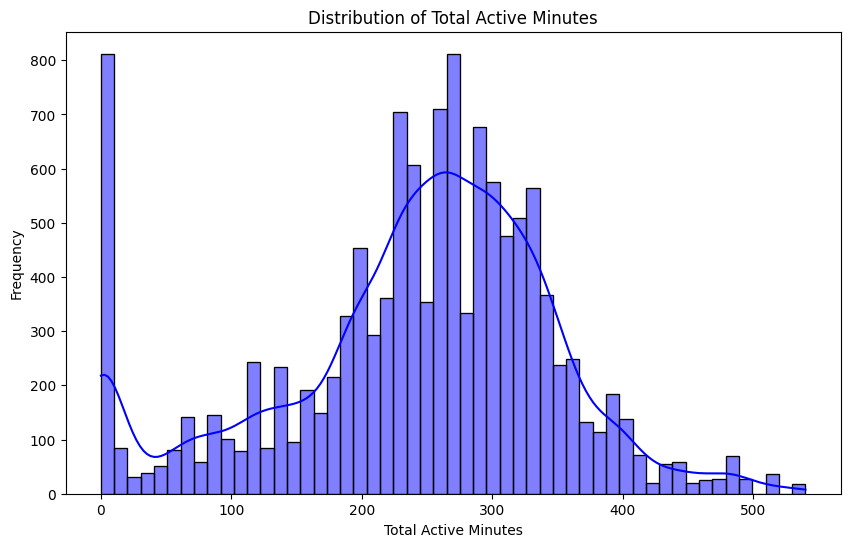

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


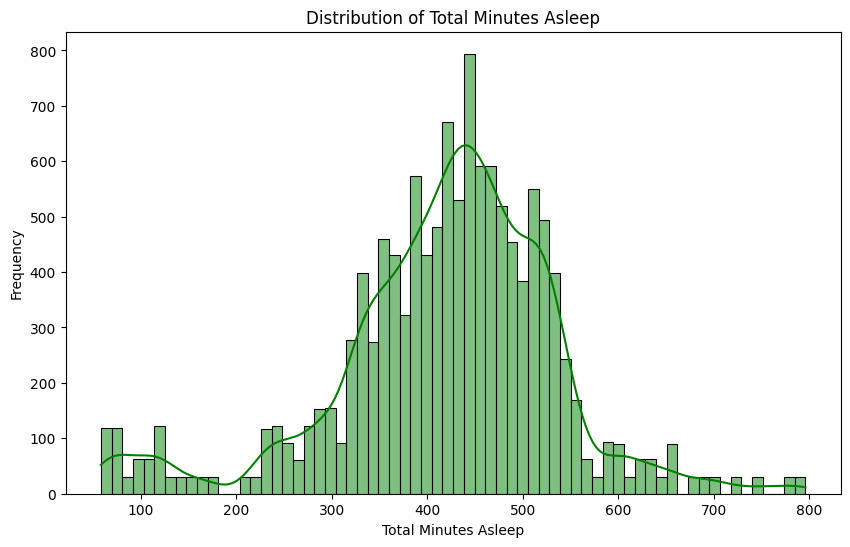

In [21]:
# Step 6: Optional - Create visualizations for better understanding of data
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of Total Active Minutes
plt.figure(figsize=(10, 6))
sns.histplot(combined_data['TotalActiveMinutes'], kde=True, color='blue')
plt.title('Distribution of Total Active Minutes')
plt.xlabel('Total Active Minutes')
plt.ylabel('Frequency')
plt.show()

# Distribution of Total Minutes Asleep
plt.figure(figsize=(10, 6))
sns.histplot(combined_data['TotalMinutesAsleep'], kde=True, color='green')
plt.title('Distribution of Total Minutes Asleep')
plt.xlabel('Total Minutes Asleep')
plt.ylabel('Frequency')
plt.show()

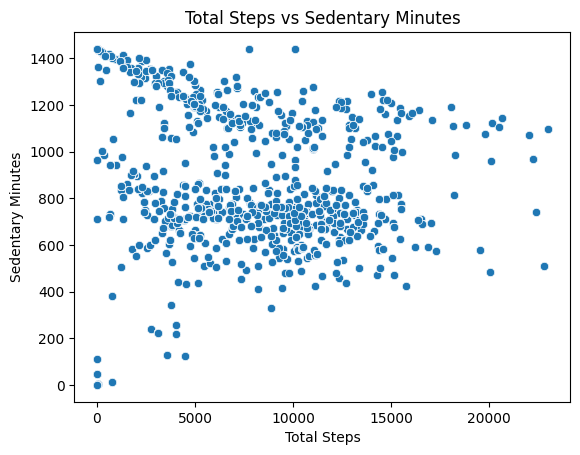

In [22]:
# What's the relationship between steps taken in a day and sedentary minutes? 
# How could this help inform the customer segments that we can market to? 
# E.g. position this more as a way to get started in walking more? 
# Or to measure steps that you're already taking?

sns.scatterplot(data=combined_data, x='TotalSteps', y='SedentaryMinutes')
plt.xlabel('Total Steps')
plt.ylabel('Sedentary Minutes')
plt.title('Total Steps vs Sedentary Minutes')
plt.show()

- user with few steps tend to have high number of sedentary minutes
- as number of step increase, sedentary minutes decrease, although not perfectly linear
### Marketing Insights:
- target low daily steps participants by promoting product as way to improve activity levels
- encourage maintainance & tracking for active users. Because even take many steps, they still have high sedentary. It can help them track moment of inactivity during the day

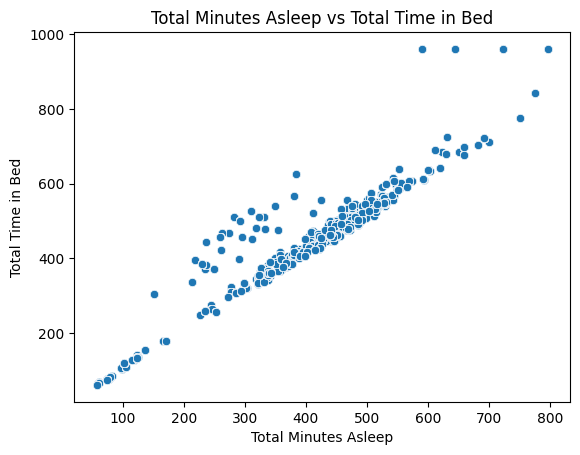

In [23]:
# What's the relationship between minutes asleep and time in bed? 
# You might expect it to be almost completely linear - are there any unexpected trends?

sns.scatterplot(data=combined_data, x='TotalMinutesAsleep', y='TotalTimeInBed')
plt.xlabel('Total Minutes Asleep')
plt.ylabel('Total Time in Bed')
plt.title('Total Minutes Asleep vs Total Time in Bed')
plt.show()

- the relation seem nearly linear, indicate strong correlation leads to good quality sleep
- outlier points where significant time in bed but low minutes asleep indicate restlessness, difficulties falling asleep, or frequent waking throughout the night.
### Marketing Insight
- target those spend significant time in bed but can't fall asleep -> highlight how user can improve sleep habits
- giving personalized recommendation like adjusting bedtime routine or using relaxation technique to maximize sleep quality

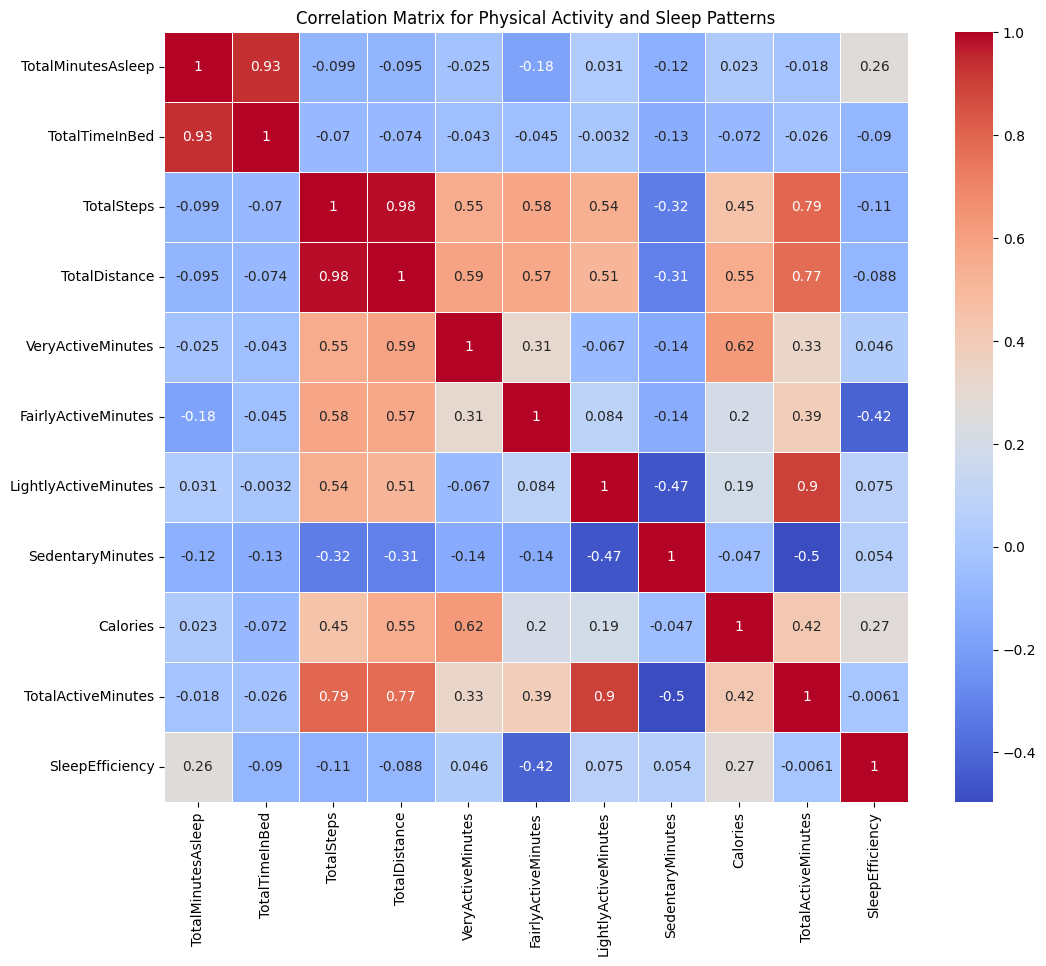

In [24]:
columns_of_interest = [
    'TotalMinutesAsleep', 'TotalTimeInBed', 'TotalSteps', 'TotalDistance',
    'VeryActiveMinutes', 'FairlyActiveMinutes', 'LightlyActiveMinutes',
    'SedentaryMinutes', 'Calories', 'TotalActiveMinutes', 'SleepEfficiency'
]
df_subset = combined_data[columns_of_interest].copy()

# Step 4: Replace any inf values with NaN to avoid issues in correlation
df_subset.replace([np.inf, -np.inf], np.nan, inplace=True)

# Step 5: Drop rows with NaN values to ensure accurate correlations
df_subset.dropna()

# Step 6: Calculate the correlation matrix
correlation_matrix = df_subset.corr()

# Step 7: Visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix for Physical Activity and Sleep Patterns')
plt.show()

## Hypothesis Testing ##

Two-Sample T-Test Results:
T-statistic: 5.044741559242541
P-value: 4.60540110809495e-07
Reject the null hypothesis: There is a significant difference in sleep efficiency between high and low sedentary minute groups.


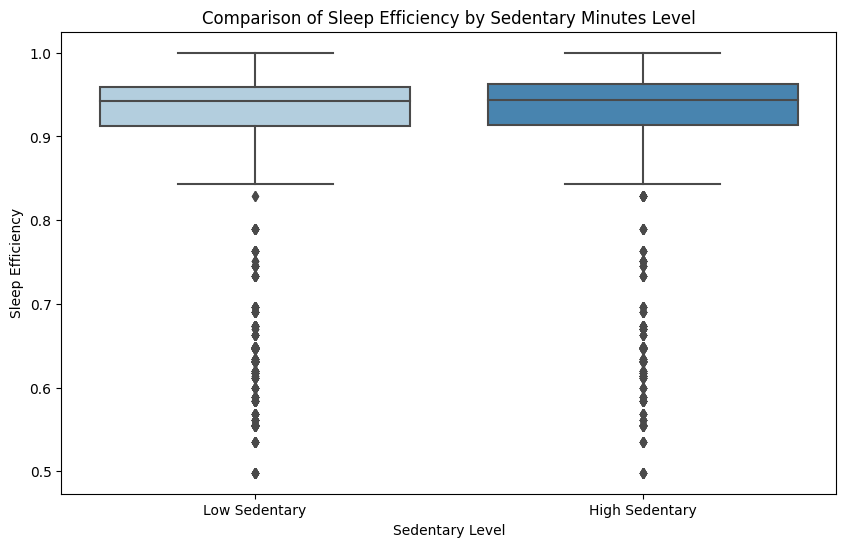

In [25]:
from scipy.stats import ttest_ind

columns_of_interest = ['SedentaryMinutes', 'SleepEfficiency']
df_subset2 = combined_data[columns_of_interest].copy()
# Step 4: Replace any inf values with NaN and drop NaN values
df_subset2.replace([np.inf, -np.inf], np.nan, inplace=True)
df_subset2.dropna(inplace=True)

# Step 5: Split the data into two groups based on median of SedentaryMinutes
median_sedentary_minutes = df_subset2['SedentaryMinutes'].median()
high_sedentary = df_subset2[df_subset2['SedentaryMinutes'] > median_sedentary_minutes]
low_sedentary = df_subset2[df_subset2['SedentaryMinutes'] <= median_sedentary_minutes]

# Step 6: Conduct a Two-Sample T-Test
t_stat, p_value = ttest_ind(high_sedentary['SleepEfficiency'], low_sedentary['SleepEfficiency'])

print("Two-Sample T-Test Results:")
print("T-statistic:", t_stat)
print("P-value:", p_value)

# Step 7: Interpretation of the results
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in sleep efficiency between high and low sedentary minute groups.")
else:
    print("Fail to reject the null hypothesis: No significant difference in sleep efficiency between the groups.")

# Step 8 (Optional): Visualize the results without warnings
# Create two separate DataFrames for each group
low_sedentary_df = pd.DataFrame({
    'Sedentary Level': ['Low Sedentary'] * len(low_sedentary),
    'Sleep Efficiency': low_sedentary['SleepEfficiency']
})

high_sedentary_df = pd.DataFrame({
    'Sedentary Level': ['High Sedentary'] * len(high_sedentary),
    'Sleep Efficiency': high_sedentary['SleepEfficiency']
})

# Concatenate the two DataFrames
plot_df = pd.concat([low_sedentary_df, high_sedentary_df], ignore_index=True)

# Plot the data using Seaborn
plt.figure(figsize=(10, 6))
sns.boxplot(x='Sedentary Level', y='Sleep Efficiency', data=plot_df, palette="Blues")
plt.title('Comparison of Sleep Efficiency by Sedentary Minutes Level')
plt.xlabel('Sedentary Level')
plt.ylabel('Sleep Efficiency')
plt.show()

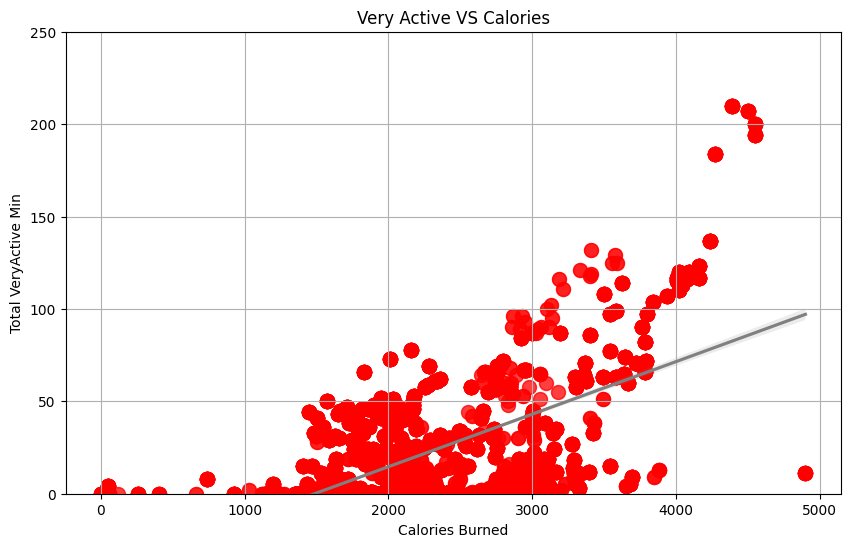

In [26]:
plt.figure(figsize=(10, 6))
sns.regplot(x='Calories', y='VeryActiveMinutes', data=combined_data, scatter_kws={'color': 'red', 's': 100, 'alpha': 0.5}, line_kws={'color': 'gray'})
plt.title('Very Active VS Calories')
plt.xlabel('Calories Burned')
plt.ylabel('Total VeryActive Min')
plt.ylim(0,250)
plt.grid(True)
plt.show()

## Regression Analysis ## 

In [27]:
# Perform regression analysis on the combined dataset
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

# Step 1: Define features and target for regression
features = ['TotalSteps', 'TotalMinutesAsleep', 'TotalTimeInBed', 'TotalDistance', 'TrackerDistance',
            'VeryActiveMinutes', 'FairlyActiveMinutes', 'LightlyActiveMinutes', 'SedentaryMinutes']

target = 'Calories'

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(combined_data[features], combined_data[target], test_size=0.2, random_state=42)

# Step 2: Fit the regression model
X_train = sm.add_constant(X_train)  # Add a constant for the intercept
model = sm.OLS(y_train, X_train).fit()

# Step 3: Summarize the regression results
regression_summary = model.summary()
regression_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Calories   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     4749.
Date:                Sun, 06 Oct 2024   Prob (F-statistic):               0.00
Time:                        15:35:09   Log-Likelihood:                -71924.
No. Observations:                9952   AIC:                         1.439e+05
Df Residuals:                    9942   BIC:                         1.439e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  958.7831     23.150     41.415      0.000     913.403    1004.163
TotalSteps              -0.5564      0.005   -121.626      0.000      -0.565      -0.547
TotalMinutesAsleep       3.2650      0.087     37.729      0.000       3.095       3.435
TotalTimeInBed          -2.8834      0.079    -36.287      0.000      -3.039      -2.728
TotalDistance          -54.1823     35.200     -1.539      0.124    -123.182      14.817
TrackerDistance        815.6567     35.319     23.094      0.000     746.424     884.890
VeryActiveMinutes       11.8675      0.147     80.681      0.000      11.579      12.156
FairlyActiveMinutes      5.0370      0.207     24.348      0.000       4.631       5.443
LightlyActiveMinutes     3.2565      0.058     55.675      0.000       3.142       3.371
SedentaryMinutes         0.5709      0.015     38.893      0.000       0.542       0.600
==============================================================================
Omnibus:                      831.262   Durbin-Watson:                   2.028
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5128.849
Skew:                          -0.094   Prob(JB):                         0.00
Kurtosis:                       6.512   Cond. No.                     1.39e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.39e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""